Sympy Tutorial

In [2]:
import symforce
symforce.set_symbolic_api("sympy")
symforce.set_log_level("warning")
from symforce.notebook_util import display, print_expression_tree


In [5]:
import symforce.symbolic as sf

x = sf.Symbol("x")
y = sf.Symbol("y")

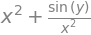

In [6]:
expr = x**2 + sf.sin(y) / x**2
display(expr)

In [7]:
print_expression_tree(expr)


Add: x**2 + sin(y)/x**2
+-Pow: x**2
| +-Symbol: x
| +-Integer: 2
+-Mul: sin(y)/x**2
  +-Pow: x**(-2)
  | +-Symbol: x
  | +-Integer: -2
  +-sin: sin(y)
    +-Symbol: y


In [8]:
expr.subs({x:1.2, y:0.4})

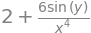

In [12]:
(expr.diff(x)).diff(x)

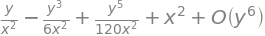

In [18]:
sf.series(expr, y)

Geometry tutorial

In [2]:
# Setup
import symforce

symforce.set_symbolic_api("sympy")
symforce.set_log_level("warning")

from symforce.notebook_util import display
import symforce.symbolic as sf
from symforce import ops

In [3]:
display(sf.Rot3())


<Rot3 <Q xyzw=[0, 0, 0, 1]>>

In [4]:
display(sf.Rot3.symbolic("R"))


<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>

In [5]:
theta = sf.Symbol("theta")
R_mat = sf.Matrix(
    [
        [1, 0, 0],
        [0, sf.cos(theta), -sf.sin(theta)],
        [0, sf.sin(theta), sf.cos(theta)],
    ]
)
R = sf.Rot3.from_rotation_matrix(R_mat)

display(R_mat)
display(R)  # Note the additional expressions required to avoid numerical errors
display(R.to_rotation_matrix())
# display(ops.StorageOps.simplify(R.to_rotation_matrix()),epsilon = sf.epsilon)

⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦

<Rot3 <Q xyzw=[(1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)))*(sqrt(Max(0, 2 - 2*cos(theta)))/2 + Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))/2) + 2*sin(theta)*Min(1 - Max(0, sign(-2*cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)))), Max(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))), 1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta))))))))))/(2*sqrt(Max(0, 2*cos(theta) + 2)) - 2*Min(1 - Max(0, sign(-2*cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)))), Max(1 - Max(0, 1 - Max(0, sig

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢ ⎛1   Min(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1
⎢ ⎜─ - ───────────────────────────────────────────────────────────────────────
⎢ ⎝2                                                                          
⎢                                                                             
⎢                                                   

In [6]:
R = sf.Rot3.from_yaw_pitch_roll(0, 0, theta)  # Yaw rotation only
ypr = R.to_yaw_pitch_roll()

display(R)
display(ops.StorageOps.simplify(list(ypr)))  # Simplify YPR expression

<Rot3 <Q xyzw=[sin(theta/2), 0, 0, cos(theta/2)]>>

In [7]:
R = sf.Rot3.from_angle_axis(angle = theta, axis = sf.Vector3(1,3,0))

In [8]:
world_R_body = sf.Rot3.symbolic('R')

In [9]:
body_t_point = sf.V3.symbolic("t")

In [10]:
world_H_body = sf.Pose3(R = world_R_body, t = sf.V3())

In [11]:
world_t_point = world_H_body * body_t_point

In [12]:
world_t_point

⎡   ⎛       2        2    ⎞                                                   
⎢t₀⋅⎝- 2⋅R_y  - 2⋅R_z  + 1⎠ + t₁⋅(-2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + t₂⋅(2⋅R_w⋅R_y + 2⋅R
⎢                                                                             
⎢                               ⎛      2        2    ⎞                        
⎢t₀⋅(2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + t₁⋅⎝- 2⋅Rₓ  - 2⋅R_z  + 1⎠ + t₂⋅(-2⋅R_w⋅Rₓ + 2⋅R_y
⎢                                                                             
⎢                                                            ⎛      2        2
⎣t₀⋅(-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z) + t₁⋅(2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z) + t₂⋅⎝- 2⋅Rₓ  - 2⋅R_y 

      ⎤
ₓ⋅R_z)⎥
      ⎥
      ⎥
⋅R_z) ⎥
      ⎥
    ⎞ ⎥
 + 1⎠ ⎦

In [13]:
body_R_cam = sf.Rot3.symbolic("R_cam")
world_R_body = world_R_body * body_R_cam

cam_R_body = body_R_cam.inverse()
display(body_R_cam)
display(cam_R_body)

<Rot3 <Q xyzw=[R_cam_x, R_cam_y, R_cam_z, R_cam_w]>>

<Rot3 <Q xyzw=[-R_cam_x, -R_cam_y, -R_cam_z, R_cam_w]>>

In [14]:
display(world_R_body)

<Rot3 <Q xyzw=[R_cam_w*R_x + R_cam_x*R_w - R_cam_y*R_z + R_cam_z*R_y, R_cam_w*R_y + R_cam_x*R_z + R_cam_y*R_w - R_cam_z*R_x, R_cam_w*R_z - R_cam_x*R_y + R_cam_y*R_x + R_cam_z*R_w, R_cam_w*R_w - R_cam_x*R_x - R_cam_y*R_y - R_cam_z*R_z]>>

In [15]:
world_R_body = sf.Rot3.symbolic("R")
world_R_body_numeric = sf.Rot3.from_yaw_pitch_roll(0.1, -2.3, 0.7)
display(world_t_point.subs(world_R_body, world_R_body_numeric))

⎡-0.662947416398295⋅t₀ - 0.554353314451006⋅t₁ - 0.503182994394693⋅t₂ ⎤
⎢                                                                    ⎥
⎢-0.0665166116342196⋅t₀ + 0.713061539471145⋅t₁ - 0.697938952419008⋅t₂⎥
⎢                                                                    ⎥
⎣ 0.74570521217672⋅t₀ - 0.429226797490819⋅t₁ - 0.509596009450867⋅t₂  ⎦

Poses


In [16]:
world_T_bobdy = sf.Pose3.symbolic("T")
display(world_T_bobdy)

<Pose3 R=<Rot3 <Q xyzw=[T.R_x, T.R_y, T.R_z, T.R_w]>>, t=(T.t0, T.t1, T.t2)>

In [17]:
world_R_body = sf.Rot3.symbolic("R")

world_t_body = sf.Vector3.symbolic("t")

world_T_body = sf.Pose3(R=world_R_body, t = world_t_body)
display(world_T_body)

<Pose3 R=<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>, t=(t0, t1, t2)>

In [18]:
body_T_cam = sf.Pose3.symbolic("T_cam")
world_T_cam = world_T_body * body_T_cam

In [20]:
body_t_point = sf.V3.symbolic("p")

world_t_point = world_T_body * body_t_point 
display(world_t_point)

⎡   ⎛       2        2    ⎞                                                   
⎢p₀⋅⎝- 2⋅R_y  - 2⋅R_z  + 1⎠ + p₁⋅(-2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + p₂⋅(2⋅R_w⋅R_y + 2⋅R
⎢                                                                             
⎢                               ⎛      2        2    ⎞                        
⎢p₀⋅(2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + p₁⋅⎝- 2⋅Rₓ  - 2⋅R_z  + 1⎠ + p₂⋅(-2⋅R_w⋅Rₓ + 2⋅R_y
⎢                                                                             
⎢                                                            ⎛      2        2
⎣p₀⋅(-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z) + p₁⋅(2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z) + p₂⋅⎝- 2⋅Rₓ  - 2⋅R_y 

           ⎤
ₓ⋅R_z) + t₀⎥
           ⎥
           ⎥
⋅R_z) + t₁ ⎥
           ⎥
    ⎞      ⎥
 + 1⎠ + t₂ ⎦

In [21]:
body_T_world = world_T_body.inverse()
display(world_T_body)
display(body_T_world)

<Pose3 R=<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>, t=(t0, t1, t2)>

<Pose3 R=<Rot3 <Q xyzw=[-R_x, -R_y, -R_z, R_w]>>, t=(-t0*(-2*R_y**2 - 2*R_z**2 + 1) - t1*(2*R_w*R_z + 2*R_x*R_y) - t2*(-2*R_w*R_y + 2*R_x*R_z), -t0*(-2*R_w*R_z + 2*R_x*R_y) - t1*(-2*R_x**2 - 2*R_z**2 + 1) - t2*(2*R_w*R_x + 2*R_y*R_z), -t0*(2*R_w*R_y + 2*R_x*R_z) - t1*(-2*R_w*R_x + 2*R_y*R_z) - t2*(-2*R_x**2 - 2*R_y**2 + 1))>

Vectors and Matrices

In [25]:
import numpy as np

In [23]:
m1 = sf.Matrix([[1,2,3],[4,5,6]])
display(m1)

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [40]:
m2 = sf.Matrix(np.asarray([[1,2,3],[4,5,6]]).T)
display(m2)

⎡1  4⎤
⎢    ⎥
⎢2  5⎥
⎢    ⎥
⎣3  6⎦

In [41]:
m3 = sf.Matrix(np.asarray([[1,4],[2,5], [3,6]]))
display(m3)

⎡1  4⎤
⎢    ⎥
⎢2  5⎥
⎢    ⎥
⎣3  6⎦

In [38]:
m2 == m3

False

In [44]:
m2 = sf.Matrix(2, 3, [1, 2, 3, 4, 5, 6])
display(m2)

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [45]:
m3 = sf.Matrix23(1, 2, 3, 4, 5, 6)
display(m3)
m4 = sf.Matrix23([1, 2, 3, 4, 5, 6])
display(m4)

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [51]:
m9 = sf.Matrix23.block_matrix([[sf.Matrix13([1,2,3])], [sf.M13([4,5,6])]])
display(m9)

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [53]:
m3 == m9

True

In [66]:
v1 = sf.Matrix([[1],[2],[3]])
v2 = sf.Matrix([1,2,3])

In [67]:
v1 == v2

True

In [68]:
v3 = sf.Matrix31(1,2,3)
v4 = sf.Matrix13(1,2,3)

In [69]:
v3 == v4

False

In [70]:
z1 = sf.M32.zero()

In [71]:
z1

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

In [74]:
m23 = sf.M23.symbolic("lhs")
m31 = sf.V3.symbolic("rhs")
display(m23 * m31)

⎡lhs₀ ₀⋅rhs₀ + lhs₀ ₁⋅rhs₁ + lhs₀ ₂⋅rhs₂⎤
⎢                                       ⎥
⎣lhs₁ ₀⋅rhs₀ + lhs₁ ₁⋅rhs₁ + lhs₁ ₂⋅rhs₂⎦

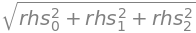

In [76]:
norm = m31.norm()
display(norm)

In [75]:
squared_norm = m31.squared_norm()
display(squared_norm)

In [78]:
temp = norm ** 2
display(temp == squared_norm)

True

In [83]:
unit_vec = m31.normalized()
display(unit_vec)

⎡           rhs₀           ⎤
⎢──────────────────────────⎥
⎢   _______________________⎥
⎢  ╱     2       2       2 ⎥
⎢╲╱  rhs₀  + rhs₁  + rhs₂  ⎥
⎢                          ⎥
⎢           rhs₁           ⎥
⎢──────────────────────────⎥
⎢   _______________________⎥
⎢  ╱     2       2       2 ⎥
⎢╲╱  rhs₀  + rhs₁  + rhs₂  ⎥
⎢                          ⎥
⎢           rhs₂           ⎥
⎢──────────────────────────⎥
⎢   _______________________⎥
⎢  ╱     2       2       2 ⎥
⎣╲╱  rhs₀  + rhs₁  + rhs₂  ⎦

In [84]:
R0 = sf.Rot3.symbolic("R0")
R1 = sf.Rot3.symbolic("R1")
residual = sf.M(R0.local_coordinates(R1))
display(residual)

⎡2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅(R_0_w⋅
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                               ______________
⎢                                                              ╱              
⎢                                                            ╲╱  1 - Min(1.0, 
⎢                                                                             
⎢2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅(R_0_w⋅
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                               ______________
⎢                                                              ╱              
⎢                                                            ╲╱  1 - Min(1.0, 
⎢                                                                             
⎢2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y 

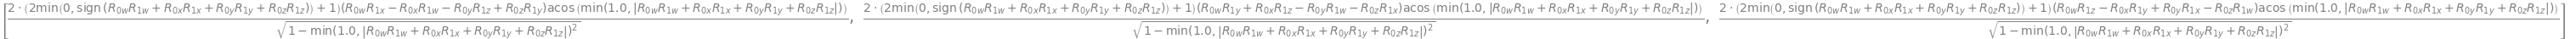

In [85]:
R0.local_coordinates(R1)

In [87]:
jacobian = residual.jacobian(R1)
display(jacobian)

⎡                                                                         ⎛  R
⎢   2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅⎜- ─
⎢                                                                         ⎝   
⎢ - ──────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                         ⎛  R
⎢   2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅⎜- ─
⎢                                                                         ⎝   
⎢ - ──────────────────────────────────────────────────────────────────────────
⎢                                                   

In [90]:
v0 = sf.Pose3.symbolic("V1")
v1 = sf.Pose3.symbolic("V1_dash")

In [92]:

residual = sf.M(v1.local_coordinates(v0))
display(residual)

⎡2⋅(2⋅Min(0, sign(V1.R_w*V1_dash.R_w + V1.R_x*V1_dash.R_x + V1.R_y*V1_dash.R_y
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢2⋅(2⋅Min(0, sign(V1.R_w*V1_dash.R_w + V1.R_x*V1_dash.R_x + V1.R_y*V1_dash.R_y
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢2⋅(2⋅Min(0, sign(V1.R_w*V1_dash.R_w + V1.R_x*V1_das